SOURCES

1:  https://stackoverflow.com/questions/58760152/how-to-break-a-tie-randomly-from-the-highest-values-of-a-dictionary-in-python

2:  

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
GAMMA = .95
EPSILON = .1
ALPHA = .1
RUNS = 20
EPISODES = 50
NS = [0,5,50]

WIDTH = 9
HEIGHT = 6
START = (2,0)
END = (0,8)
WALLS = [(1,2),(2,2),(3,2),(4,5),(0,7),(1,7),(2,7)]
ACTIONS = [(1,0),(0,1),(-1,0),(0,-1)] #indexed by height then width

In [14]:
environment = np.zeros((HEIGHT,WIDTH))
environment[START] = 1 #Start
environment[END] = 2 #End 
for wall in WALLS:
    environment[wall] = -1
print(environment)

[[ 0.  0.  0.  0.  0.  0.  0. -1.  2.]
 [ 0.  0. -1.  0.  0.  0.  0. -1.  0.]
 [ 1.  0. -1.  0.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
def tupleAdd(t1,t2):
    return tuple(sum(i) for i in zip(t1,t2))

def step(s,a):
    sPrime = tupleAdd(s,a)
    r = 1 if sPrime == END else 0
    return sPrime, r

In [16]:
def getAvailableActions(s):
    availableActions = []
    for a in ACTIONS:
        dest = tupleAdd(s,a)
        if dest[0] < HEIGHT and dest[0] >= 0 and dest[1] < WIDTH and dest[1] >= 0 and environment[dest] != -1:
            availableActions.append(a)
    return availableActions

def initQ():
    Q = []
    for i in range(HEIGHT):
        col = []
        for j in range(WIDTH):
            options = {}
            for action in getAvailableActions((i,j)):
                options[action] = 0
            col.append(options)
        Q.append(col)
    return np.asarray(Q)

In [17]:
def getAction(Qs):
    #Greedy
    if random.random() > EPSILON:
        #Source 1
        maxValue = max(Qs.values())
        keys = [key for key, value in Qs.items() if value == maxValue]
        return random.choice(keys)
    #Exploratory
    else:
        keys = [key for key, value in Qs.items()]
        return random.choice(keys)

In [18]:
def dynaQ(Q,model,n):
    steps = 0
    s = START
    while(True):
        steps += 1
        a = getAction(Q[s])
        sPrime,r = step(s,a)
        done = True if r == 1 else False
        Q[s][a] += ALPHA * (r + GAMMA * (max(Q[sPrime].values())) - Q[s][a])
        model[(s,a)] = (sPrime,r)
        sNext = sPrime #pass this value around the planning
        for _ in range(n):
            keys = [key for key, value in model.items()]
            s,a = random.choice(keys)
            sPrime,r = model[(s,a)]
            Q[s][a] += ALPHA * (r + GAMMA * (max(Q[sPrime].values())) - Q[s][a])
        s = sNext
        if done:
            break
    return steps,QUpdates

In [19]:
def algorithm():
    allPlannings = []
    for n in NS:
        allRuns = []
        for _ in range(RUNS):
            episodes = []
            Q = initQ()
            model = {}
            for _ in range(EPISODES):
                episodes.append(dynaQ(Q,model,n))
            allRuns.append(episodes)
        allRuns = np.asarray(allRuns)
        allRunsMean = np.mean(allRuns,axis=0)
        allPlannings.append(allRunsMean)
    return allPlannings

In [20]:
plannings = algorithm()

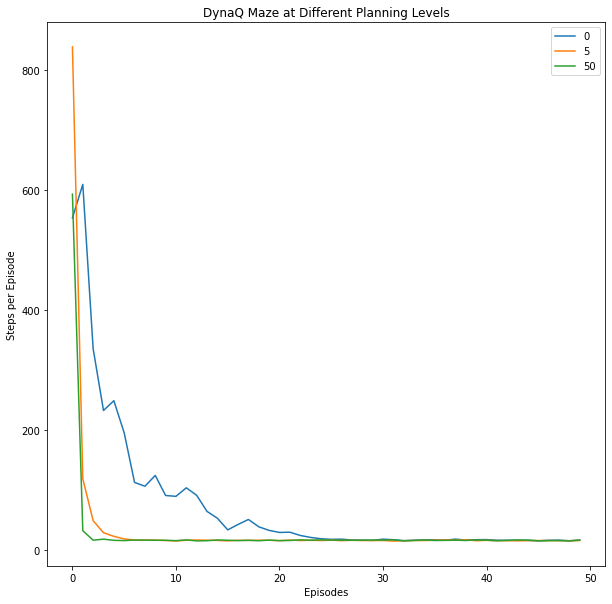

In [26]:
plt.figure(figsize=(10,10))
for planning,n in zip(plannings,NS):
    plt.plot(planning,label=n)
plt.xlabel("Episodes")
plt.ylabel("Steps per Episode")
plt.title("DynaQ Maze at Different Planning Levels")
plt.legend()
plt.savefig("../figures/example8-1/DynaMaze")